
<img src="https://res.cloudinary.com/grohealth/image/upload/c_fill,f_auto,fl_lossy,h_650,q_auto,w_1085/v1581695681/DCUK/Content/causes-of-diabetes.png" alt="Drawing" style="width: 600px;"/>

# Project Title : Studying prevalence of diabetes using Econometric,        Enviornmental and genetic Models


## Sections :-
### 1 :  <a href = '#Introduction'> Introduction</a>
### 2 :  <a href = '#Importing Libraries'> Importing Libraries</a>
### 3 :  <a href = '#Understanding our Data'>  Understanding our Data</a>
### 4 :  <a href = '#Preprocessing Data'>  Preprocessing Data</a>
  ######            a) <a href = '#Handling Missing Values'>  Handling Missing Values</a>
### 5:  <a href = '#Visualizing our Data'>  Visualizing our Data</a>
### 6:  <a href = '#Feature Engineering & Decriptive Analysis'>  Feature Engineering & Decriptive Analysis</a>
### 7:  <a href = '#Diagnostic Analysis'>  Diagnostic Analysis</a>
### 8: <a href = '#Applying Regression algorithms'> Applying Regression algorithms </a>
######            a) <a href = '#Linear Regression'>  Linear Regression</a>
######            b) <a href = '#Polynomial Regression'>  Polynomial Regression</a>
######            c) <a href = '#Ridge Regression'>  Ridge Regression</a>
### 9: <a href = '#Conclusion'> Conclusion </a>

<a id = 'Introduction'> </a>
# Introduction   :- 
This project highlights how diabetes has been growing in Indian States and what were the factors which led to those increase.

People use to think that genetic probelms are the key factors or the only factors which gets a person to have diabetes but in this project we have seen that not only genetic probelms but economic and enviornmental problems of a state are also the reason behind a person having diabetes

To support our hypothesis we have read many research papers and gathered data from trustworthy resources, links to all those resources will be given in the end


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id = 'Importing Libraries'> </a>
# Importing Libraries   :- 

In [1]:
# for making dataframes and using excel sheets
import pandas as pd

# for visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# for seeing current directory
import os

# for handling missing values
from sklearn.impute import SimpleImputer

# for applying Regression algorithms
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

##### Our prime focus was to study diabetes from 2015-2018, and see how diabetes was changing in these years, with respect to all other features we selected for the study

In [2]:
# creating a dataframe
df = pd.read_excel("final_dataset_for_forcasting.xlsx")
df.head()

,State,people_having_diabetes_2015-16,people_having_diabetes_2016-2017,people_having_diabetes_2017-2018,people_having_diabetes_2018-19,People_having_diabetes_2019-2020,GDP_2015-16,GDP_2016-17,GDP_2017-18,GDP_2018-19,GDP_2019-20,AQI 2015,AQI 2016,AQI 2017,AQI 2018,AQI 2019
0,West Bengal,3155931.801,2.852664e+06,NaN,4149752.250,NaN,797300,872527,999585,1177586.0,1314529.0,NaN,NaN,NaN,308.0,289.0
1,Uttarakhand,216212.640,NaN,837704.550,329083.851,NaN,177163,195125,222836,245895.0,263233.0,155.0,180.0,190.0,175.0,171.0
2,Uttar Pradesh,4494691.362,NaN,NaN,5389724.016,NaN,1137210,1248374,1376324,1542432.0,1579807.0,324.0,342.0,387.0,403.0,350.0
3,Tripura,117120.690,7.921622e+04,590538.984,158862.288,NaN,35938,39612,46133,NaN,NaN,60.0,52.0,NaN,NaN,110.0
4,Telangana,1596157.463,NaN,NaN,1860696.096,NaN,577902,659033,753811,865688.0,969604.0,213.0,173.0,138.0,134.0,107.0


<a id = 'Understanding our Data'> </a>

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Understanding our Data : What each column means
##### 1 : people_having_diabetes : Count of people in each state year wise from 2015-2018
##### 2 : GDP : Gross Domestic Product of each state year wise from 2015-2020
##### 3 : AQI : Air Quality Index of Each State year wise from 2015-2019 ------>    Good	0-50, Satisfactory	51-100, Moderate	101-200, Poor	201-300


In [3]:
# getting some information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State                             33 non-null     object 
 1   people_having_diabetes_2015-16    33 non-null     float64
 2   people_having_diabetes_2016-2017  13 non-null     float64
 3   people_having_diabetes_2017-2018  7 non-null      float64
 4   people_having_diabetes_2018-19    33 non-null     float64
 5   People_having_diabetes_2019-2020  0 non-null      float64
 6   GDP_2015-16                       33 non-null     int64  
 7   GDP_2016-17                       33 non-null     int64  
 8   GDP_2017-18                       33 non-null     int64  
 9   GDP_2018-19                       23 non-null     float64
 10  GDP_2019-20                       18 non-null     float64
 11  AQI 2015                          17 non-null     float64
 12  AQI 2016  

In [4]:
# dropping columns of year 2019 for all features due to unavaliablity of data
df.drop(['People_having_diabetes_2019-2020',
         'GDP_2019-20', 'AQI 2019'], axis=1, inplace=True)
df.isnull().sum()

State                                0
people_having_diabetes_2015-16       0
people_having_diabetes_2016-2017    20
people_having_diabetes_2017-2018    26
people_having_diabetes_2018-19       0
GDP_2015-16                          0
GDP_2016-17                          0
GDP_2017-18                          0
GDP_2018-19                         10
AQI 2015                            16
AQI 2016                            25
AQI 2017                            20
AQI 2018                            17
dtype: int64

###### We have a lot of NAN values in our dataset and thus we have to impute some certain values by some proper methods to see a proper visualization of our data


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<a id = 'Preprocessing Data'> </a>
# Preprocessing Data

In [5]:
# with the new sheet we have converted our diabetes column into % as they show much better prevalence than continous numbers
df = pd.read_excel("dataset_with_percentage.xlsx")

# converting our %diabetes into a number for better understanding
df['diab_2015'] = df['diab_2015']*100
df['diab_2016'] = df['diab_2016']*100
df['diab_2018'] = df['diab_2018']*100


# to look at the data with the largest State area
df = df.sort_values(by='area_per_state', ascending=False)
df.head()

,States,area_per_state,Zones,diab_2015,diab_2016,diab_2017,diab_2018,GDP 2015,GDP 2016,GDP 2017,...,population_2015-16,population_2016-17,population_2017-18,population_2018-19,population_2019-20,AQI 2015,AQI 2016,AQI 2017,AQI 2018,AQI 2019
25,Rajasthan,342238,West,1.5,5.7,NaN,1.8,681485,758809,835558,...,73471198,74692571,75909414,77121348,78328005,433.0,338.0,451.0,509.0,417.0
16,Madhya Pradesh,308350,Central,2.1,8.7,NaN,2.4,541189,648849,728242,...,78180854,79562560,80940564,82314396,83683604,89.0,NaN,NaN,NaN,187.0
17,Maharashtra,307713,West,2.5,7.4,NaN,2.7,1966147,2188532,2411600,...,118040394,119428710,120805261,122169830,123522214,NaN,NaN,145.0,146.0,92.0
30,Uttar Pradesh,243290,North,2.1,6.7,NaN,2.4,1137210,1248374,1376324,...,214032922,217559836,221073168,224571834,228054788,NaN,NaN,NaN,NaN,NaN
9,Gujarat,196024,West,2.3,6.2,NaN,3.2,1029010,1153327,1314680,...,64919427,66032362,67141736,68247188,69348367,50.0,NaN,NaN,NaN,NaN


##### Note : Added  some features like : 'population of states' , 'area of states' , 'classified states based on Zones'

<a id = 'Handling Missing Values'> </a>
### Handling Missing Values: 



We searched for a way through which we can impute the best possible values in the place of missing values, Methods we used were


1) Imputing Mean Values  


2) Looking at the percentage change in population of a state and assuming the same growth with the diabetes for a state


3) Looking at the percentage change in GDP of a state and assuming the same growth with the diabetes for a state



We are imputing missing values so that we can visualize our data in much more efficient way

Note: Here in the file we are showing only 1 method to keep it brief 

In [6]:
df_method_1 = df.copy()

# for diabetes columns
df_method_1['diab_2016'].fillna(
    (df_method_1['diab_2016'].mean()), inplace=True)

df_method_1['diab_2017'] = df_method_1['diab_2017'].fillna(
    df_method_1[['diab_2015', 'diab_2016', 'diab_2018']].mean(axis=1))


# for GDP columns
df_method_1['GDP 2018'] = df_method_1['GDP 2018'].fillna((((df_method_1['GDP 2017']-df_method_1['GDP 2016'])
                                                           + (df_method_1['GDP 2016']-df_method_1['GDP 2015']))/2) + df_method_1['GDP 2017'])


df_method_1.head()

,States,area_per_state,Zones,diab_2015,diab_2016,diab_2017,diab_2018,GDP 2015,GDP 2016,GDP 2017,...,population_2015-16,population_2016-17,population_2017-18,population_2018-19,population_2019-20,AQI 2015,AQI 2016,AQI 2017,AQI 2018,AQI 2019
25,Rajasthan,342238,West,1.5,5.7,3.000000,1.8,681485,758809,835558,...,73471198,74692571,75909414,77121348,78328005,433.0,338.0,451.0,509.0,417.0
16,Madhya Pradesh,308350,Central,2.1,8.7,4.400000,2.4,541189,648849,728242,...,78180854,79562560,80940564,82314396,83683604,89.0,NaN,NaN,NaN,187.0
17,Maharashtra,307713,West,2.5,7.4,4.200000,2.7,1966147,2188532,2411600,...,118040394,119428710,120805261,122169830,123522214,NaN,NaN,145.0,146.0,92.0
30,Uttar Pradesh,243290,North,2.1,6.7,3.733333,2.4,1137210,1248374,1376324,...,214032922,217559836,221073168,224571834,228054788,NaN,NaN,NaN,NaN,NaN
9,Gujarat,196024,West,2.3,6.2,3.900000,3.2,1029010,1153327,1314680,...,64919427,66032362,67141736,68247188,69348367,50.0,NaN,NaN,NaN,NaN



##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<a id = 'Visualizing our Data'> </a>

# Visualizing our Data

In [7]:
df_data_explore = pd.read_excel(
    "final_dataset_for_forcasting_with_all_values.xlsx")

df_data_explore.drop(['Unnamed: 0'], axis=1, inplace=True)
df_data_explore.head()

,State,people_having_diabetes_2015-16,people_having_diabetes_2016-2017,people_having_diabetes_2017-2018,people_having_diabetes_2018-19,GDP_2015-16,GDP_2016-17,GDP_2017-18,GDP_2018-19,AQI 2015,AQI 2016,AQI 2017,AQI 2018
0,West Bengal,3155931.801,2.852664e+06,3.004298e+06,4149752.250,797300,872527,999585,1177586,152,152,152,308
1,Uttarakhand,216212.640,5.101954e+04,8.377045e+05,329083.851,177163,195125,222836,245895,155,180,190,175
2,Uttar Pradesh,4494691.362,5.101954e+04,2.272855e+06,5389724.016,1137210,1248374,1376324,1542432,324,342,387,403
3,Tripura,117120.690,7.921622e+04,5.905390e+05,158862.288,35938,39612,46133,779652,60,52,56,56
4,Telangana,1596157.463,5.101954e+04,8.235885e+05,1860696.096,577902,659033,753811,865688,213,173,138,134


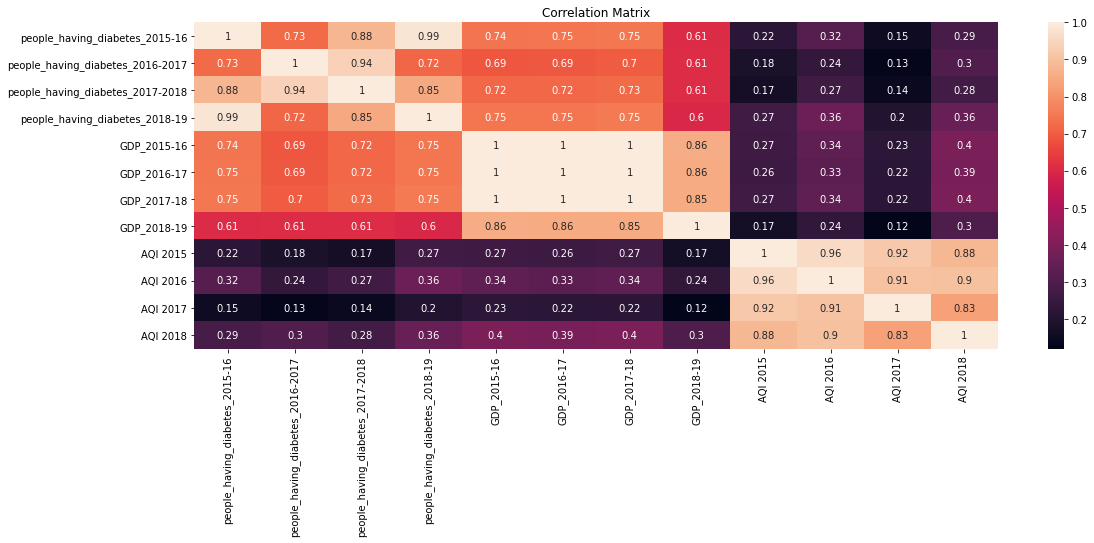

In [8]:
plt.figure(figsize=(18, 6))
plt.title("Correlation Matrix")
sns.heatmap(df_data_explore.corr(), annot=True)

##### GDP shows a quite good co-relation with diabetes but AQI doesn't have much strong Co-relation

##### But Studies prove that if the Air Quality Index of a state is > 200, then the air quality of that state is very bad and bad air quality result in affecting the insulin level in a human's body and thus making human more prone to diabetes

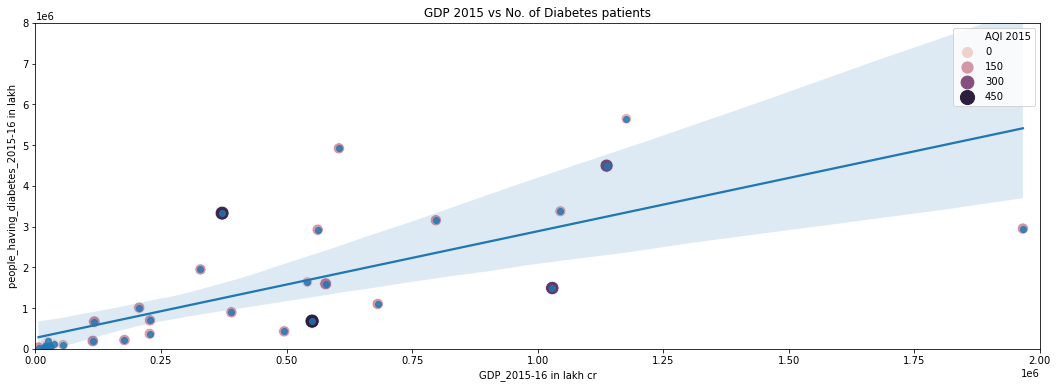

We can see that GDP and Diabetes are almost Linearly Related to Each other and with Higher GDP the Air Quality gets more severe


In [9]:
plt.figure(figsize=(18, 6))
g = sns.scatterplot('GDP_2015-16', 'people_having_diabetes_2015-16', data=df_data_explore,
                    hue="AQI 2015",
                    size='AQI 2015',
                    sizes=(100, 200))

g = sns.regplot('GDP_2015-16', 'people_having_diabetes_2015-16',
                data=df_data_explore)
g.set(xlim=(0, 2000000), ylim=(0, 8000000))
plt.title("GDP 2015 vs No. of Diabetes patients")
plt.xlabel("GDP_2015-16 in lakh cr")
plt.ylabel("people_having_diabetes_2015-16 in lakh")
plt.show()

print("We can see that GDP and Diabetes are almost Linearly Related to Each other and with Higher GDP the Air Quality gets more severe")

### Classifying Indian States in Zones to see which Zone of India is Highly Affected with diabetes

In [10]:
df_zone_wise = pd.read_excel("dataset_with_percentage.xlsx")

df = df_zone_wise.copy()

# converting the %values in a number
df['diab_2015'] = df['diab_2015']*100
df['diab_2016'] = df['diab_2016']*100
df['diab_2018'] = df['diab_2018']*100

# making groups based on Zones
group = df.groupby(["Zones"], axis=0)

# making each Zone group to visualize our data
central = group.get_group('Central')
east = group.get_group('East')
north = group.get_group('North')
north_east = group.get_group('North East')
south = group.get_group("South")
west = group.get_group('West')

# data for 2015 of diabetes patients
central_2015 = central['diab_2015'].sum()
east_2015 = east['diab_2015'].sum()
north_2015 = north['diab_2015'].sum()
north_east_2015 = north_east['diab_2015'].sum()
south_2015 = south['diab_2015'].sum()
west_2015 = west['diab_2015'].sum()

In [11]:
# data for 2016 of diabetes patients
central_2016 = central['diab_2016'].sum()
east_2016 = east['diab_2016'].sum()
north_2016 = north['diab_2016'].sum()
north_east_2016 = north_east['diab_2016'].sum()
south_2016 = south['diab_2016'].sum()
west_2016 = west['diab_2016'].sum()

# Note: We are considering diabetes
#         2017 data as we don't have enough
#                     data for that year

# data for 2018 of diabetes patients
central_2018 = central['diab_2018'].sum()
east_2018 = east['diab_2018'].sum()
north_2018 = north['diab_2018'].sum()
north_east_2018 = north_east['diab_2018'].sum()
south_2018 = south['diab_2018'].sum()
west_2018 = west['diab_2018'].sum()


# making a list of Zones year wise to gather data all in one place
data_2015 = [central_2015, east_2015, north_2015,
             north_east_2015, south_2015, west_2015]
data_2016 = [central_2016, east_2016, north_2016,
             north_east_2016, south_2016, west_2016]
data_2018 = [central_2018, east_2018, north_2018,
             north_east_2018, south_2018, west_2018]

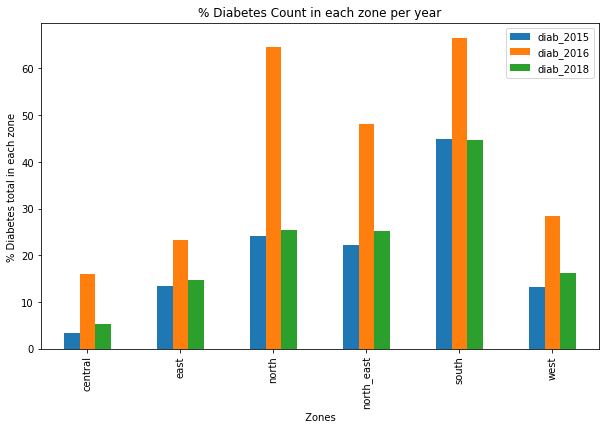

South Zone in India is the worst affected zone with diabetes followed by North and North East Respectively


In [12]:
# making a dataframe
index = ['central', 'east', 'north', 'north_east', 'south', 'west']
df1 = pd.DataFrame({'diab_2015': data_2015,
                    'diab_2016': data_2016,
                    'diab_2018': data_2018}, index=index)


# ploting Zone wise data
df1.plot(kind='bar', figsize=(10, 6))
plt.title("% Diabetes Count in each zone per year")
plt.xlabel(" Zones ")
plt.ylabel("% Diabetes total in each zone ")
plt.show()

print("South Zone in India is the worst affected zone with diabetes followed by North and North East Respectively")

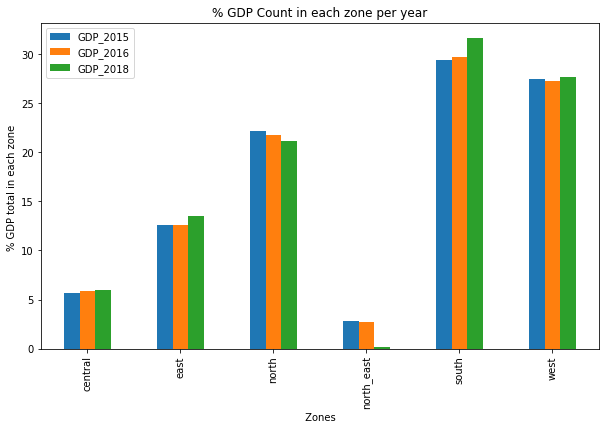

South Zone GDP is also High When Compared to other Zones

### With this we can say that With Increase in The GDP Of States or Zones, The diabetes also increases for that region


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<a id = 'Feature Engineering & Decriptive Analysis'> </a>

# Feature Engineering & Decriptive Analysis

Note : Due to unavailability of Data from year 2015-2018, We made our Project to focus on how Diabetes changed from year 1990-2016

In this section we have added few more features (and removed some features) which can play a major role for change in diabetes 

Few features which were added were:

1) diab_1990 =  diabetes in Indian States in year 1990


2) literacy_rate = literacy percentage in each state in year 1990 & 2016


3) GDP_1990 = GDP of Indian States in 1990


4) Number of factories =  Number of factories in each state in year 1990 & 2016


5) Life_expectancy = Life expectancy age for each state for year 1990 & 2016


6) poppulation_1990 = population of each state in India for year 1990



In [13]:
df = pd.read_excel("dataset_for_forcasting 1990-2016_final.xlsx",
                   sheet_name='Descriptive Analysis')

df['diab_2016'] = df['diab_2016'] * 100
df['diab_1990'] = df['diab_1990'] * 100

df.dropna(inplace=True)

df.head()

,States,area_per_state,diab_1990,diab_2016,literacy_1991,literacy_2011,GDP_1990,GDP_2016–17,number_of_factories_1990-91,number_of_factories_2014-15,Life expectancy_1991-1995,Life expectancy_2010-2014,population_1991,population_2016-17
1,Andhra Pradesh,162970,5.4,7.6,44.08,67.02,30577.0,697508.0,15205,16012.0,61.8,68.5,66508000,8.839481e+07
3,Assam,78438,5.1,6.5,52.89,72.19,9345.0,254478.0,1548,3717.0,55.7,63.9,22414000,3.381367e+07
4,Bihar,94163,4.3,5.1,37.49,61.80,24328.0,422316.0,3409,3529.0,59.3,68.1,64531000,1.172263e+08
9,Gujarat,196024,4.8,6.2,61.29,78.03,26225.0,1153327.0,10943,23433.0,61,68.7,41310000,6.585441e+07
10,Haryana,44212,4.8,7.2,55.85,75.55,12267.0,556325.0,3070,8243.0,63.4,68.6,16464000,2.725749e+07


In [14]:
descriptive_analysis = df.copy()

descriptive_analysis.drop(['area_per_state', 'literacy_1991',
                           'literacy_2011', 'GDP_1990', 'GDP_2016–17',
                           'number_of_factories_1990-91', 'number_of_factories_2014-15',
                           'Life expectancy_1991-1995', 'Life expectancy_2010-2014',
                           'population_1991', 'population_2016-17'], axis=1, inplace=True)

descriptive_analysis = descriptive_analysis.set_index('States')

descriptive_analysis.head()

,diab_1990,diab_2016
States,,
Andhra Pradesh,5.4,7.6
Assam,5.1,6.5
Bihar,4.3,5.1
Gujarat,4.8,6.2
Haryana,4.8,7.2


Text(0, 0.5, '% of people having Diabetes ')

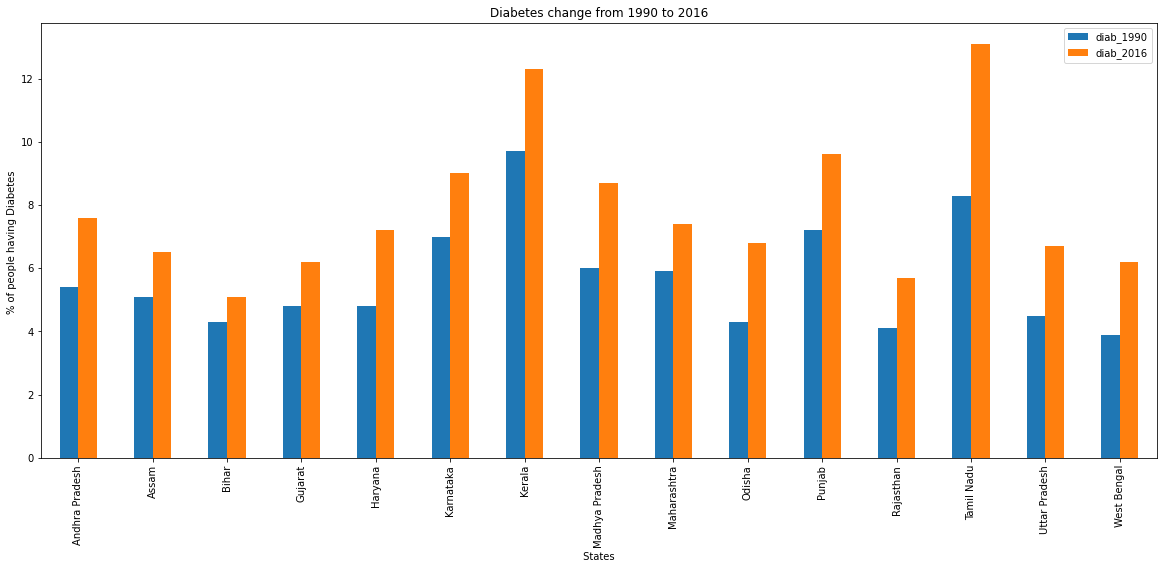

In [15]:
descriptive_analysis.plot(kind='bar', figsize=(20, 8))
plt.title("Diabetes change from 1990 to 2016")
plt.xlabel(" States ")
plt.ylabel("% of people having Diabetes ")

In [16]:
# to see the percentage change from year 1990-2016

descriptive_analysis['percentage_change'] = descriptive_analysis['diab_2016'] - \
    descriptive_analysis['diab_1990']

descriptive_analysis.reset_index(inplace=True)

# to plot value in ascending order
descriptive_analysis.sort_values('percentage_change', inplace=True)

descriptive_analysis

,States,diab_1990,diab_2016,percentage_change
2,Bihar,4.3,5.1,0.8
1,Assam,5.1,6.5,1.4
3,Gujarat,4.8,6.2,1.4
8,Maharashtra,5.9,7.4,1.5
11,Rajasthan,4.1,5.7,1.6
5,Karnataka,7.0,9.0,2.0
0,Andhra Pradesh,5.4,7.6,2.2
13,Uttar Pradesh,4.5,6.7,2.2
14,West Bengal,3.9,6.2,2.3
4,Haryana,4.8,7.2,2.4


Text(0, 0.5, '% change in Diabetes ')

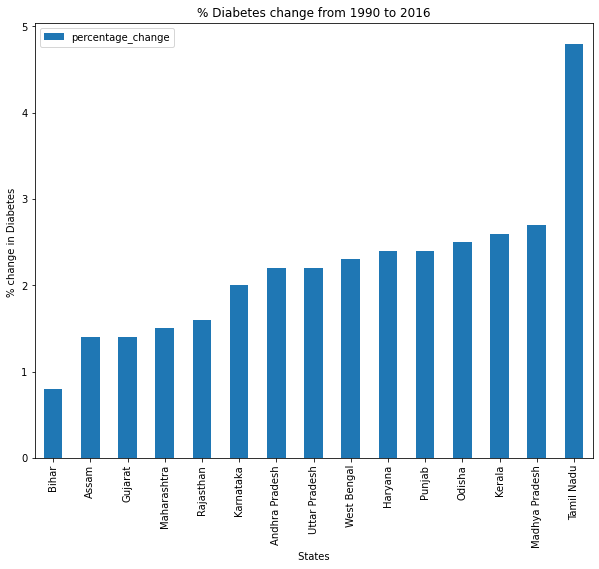

In [17]:
descriptive_analysis.plot(kind='bar', x='States',
                          y='percentage_change', figsize=(10, 8))
plt.title("% Diabetes change from 1990 to 2016")
plt.xlabel(" States ")
plt.ylabel("% change in Diabetes ")


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<a id = 'Diagnostic Analysis'> </a>

# Diagnostic Analysis

Will look for two states with the highest jump and  two states with lowest jump in diabetes from 1990 to 2016

Highest jump : Tamil Nadu , Madhya Pradesh


lowest jump : Bihar, Assam



In [18]:
diagnostic_analysis = df.copy()
diagnostic_analysis = diagnostic_analysis.set_index('States')

# taking only those 4 states into consideration
diagnostic_analysis.drop(['Andhra Pradesh', 'Gujarat', 'Haryana', 'Karnataka', 'Kerala',
                          'Maharashtra', 'Odisha', 'Punjab', 'Rajasthan',
                          'Uttar Pradesh', 'West Bengal'], axis=0, inplace=True)


# making a percentage column for every feature

diagnostic_analysis['diabetes_percentage_change'] = diagnostic_analysis['diab_2016'] - \
    diagnostic_analysis['diab_1990']
diagnostic_analysis['GDP_change'] = diagnostic_analysis['GDP_2016–17'] - \
    diagnostic_analysis['GDP_1990']
diagnostic_analysis['literacy_change'] = diagnostic_analysis['literacy_2011'] - \
    diagnostic_analysis['literacy_1991']
diagnostic_analysis['factories_change'] = diagnostic_analysis['number_of_factories_2014-15'] - \
    diagnostic_analysis['number_of_factories_1990-91']
diagnostic_analysis['life_expectancy_change'] = diagnostic_analysis['Life expectancy_2010-2014'] - \
    diagnostic_analysis['Life expectancy_1991-1995']
diagnostic_analysis['population_change'] = diagnostic_analysis['population_2016-17'] - \
    diagnostic_analysis['population_1991']

diagnostic_analysis.head()

,area_per_state,diab_1990,diab_2016,literacy_1991,literacy_2011,GDP_1990,GDP_2016–17,number_of_factories_1990-91,number_of_factories_2014-15,Life expectancy_1991-1995,Life expectancy_2010-2014,population_1991,population_2016-17,diabetes_percentage_change,GDP_change,literacy_change,factories_change,life_expectancy_change,population_change
States,,,,,,,,,,,,,,,,,,,
Assam,78438,5.1,6.5,52.89,72.19,9345.0,254478.0,1548,3717.0,55.7,63.9,22414000,3.381367e+07,1.4,245133.0,19.30,2169,8.2,1.139967e+07
Bihar,94163,4.3,5.1,37.49,61.80,24328.0,422316.0,3409,3529.0,59.3,68.1,64531000,1.172263e+08,0.8,397988.0,24.31,120,8.8,5.269525e+07
Madhya Pradesh,308350,6.0,8.7,44.67,69.32,27183.0,648849.0,3962,4240.0,54.7,64.2,48566000,7.934815e+07,2.7,621666.0,24.65,278,9.5,3.078215e+07
Tamil Nadu,130058,8.3,13.1,62.66,80.09,29026.0,1302639.0,14617,37878.0,63.3,70.6,55859000,7.840186e+07,4.8,1273613.0,17.43,23261,7.3,2.254286e+07


### Looking at each feature change to draw a conclusion


#### 1: Literacy_Rate                                                        

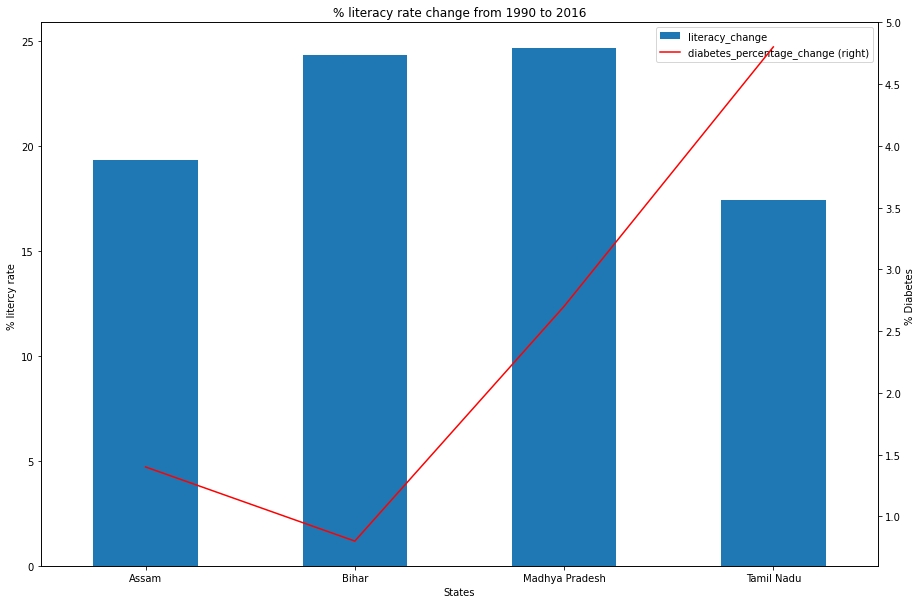

Tamil Nadu with low literacy rate has the highest prevalence in diabetes


In [19]:
diagnostic_analysis_literacy_rate = diagnostic_analysis.copy()
diagnostic_analysis_literacy_rate.reset_index(inplace=True)



# for plotting
diagnostic_analysis_literacy_rate.plot(
    kind='bar', x='States', y='literacy_change', figsize=(15, 10))
plt.ylabel("% litercy rate ")

diagnostic_analysis_literacy_rate['diabetes_percentage_change'].plot(secondary_y=True, color = 'red',legend =True)

plt.title("% literacy rate change from 1990 to 2016")
plt.xlabel(" States ")
plt.ylabel("% Diabetes ")
plt.show()


print("Tamil Nadu with low literacy rate has the highest prevalence in diabetes")

#### 2 : GDP 

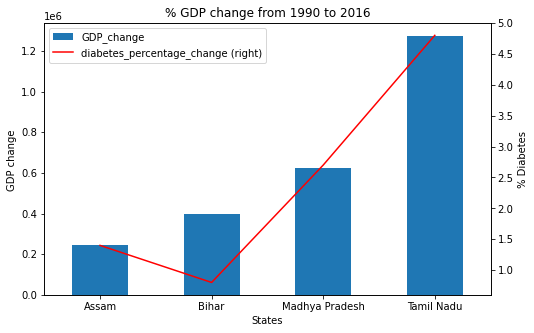

with increase in GDP the no. of diabetes patients increases


In [20]:
diagnostic_analysis_GDP_change_rate = diagnostic_analysis.copy()
diagnostic_analysis_GDP_change_rate.reset_index(inplace=True)

# for plotting
diagnostic_analysis_GDP_change_rate.plot(
    kind='bar', x='States', y='GDP_change', figsize=(8, 5))
plt.ylabel("GDP change ")



diagnostic_analysis_GDP_change_rate['diabetes_percentage_change'].plot(secondary_y=True, color = 'red',legend =True)



plt.title("% GDP change from 1990 to 2016")
plt.xlabel(" States ")
plt.ylabel(" % Diabetes ")
plt.show()

print("with increase in GDP the no. of diabetes patients increases")

#### 3: No. of Factories

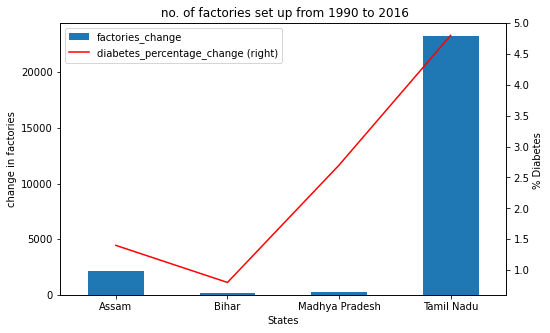

With increase in the number of factories set up in Tamil Nadu the diabetes patients have increased


In [21]:
diagnostic_analysis_factories_change_rate = diagnostic_analysis.copy()
diagnostic_analysis_factories_change_rate.reset_index(inplace=True)


# for plotting
diagnostic_analysis_factories_change_rate.plot(
    kind='bar', x='States', y='factories_change', figsize=(8, 5))
plt.ylabel("change in factories")

diagnostic_analysis_factories_change_rate['diabetes_percentage_change'].plot(secondary_y=True, color = 'red',legend =True)

plt.title(" no. of factories set up from 1990 to 2016")
plt.xlabel(" States ")
plt.ylabel("% Diabetes ")
plt.show()

print("With increase in the number of factories set up in Tamil Nadu the diabetes patients have increased")

### These 3 features helped us to give a strong conclusion with respect to Diabetes Change from year 1990- 2016


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<a id = 'Applying Regression algorithms'> </a>

# Applying Regression algorithms

In this Final Section we will see how the weight/coefficient of each independent variable is

in other words how each independent variable has a effect on dependent variable


We have applied 4 Regression Algorithms :

1) Linear Regression 

2) Polynomial Regression 

3) Ridge Regression

4) Lasso Regression

Note: Here we are applying only for one year "2016", so we have added some more features like rainfall and water quality

In [22]:
df = pd.read_excel(
    "dataset_for_forcasting 1990-2016_final.xlsx", sheet_name='Main sheet')

# will see the coefficient effect for 2016 year, and States column is not needed
df.drop(['States', 'diab_1990', 'area_per_state'], inplace=True, axis=1)

# we won't be filling null values as in this case it's hard to predict which method of filling null values will suit best
df.dropna(inplace=True)

df['diab_2016'] = df['diab_2016'] * 100


df

,diab_2016,literacy_2011,GDP_2016–17,number_of_factories_2014-15,Life expectancy_2010-2014,population_2016-17,water_quality_2014_do,water_quality_2014_pH,water_quality_2014_N,rf_sum_2014,rf_mon_2014,rf_aut_2014,rf_wint_2014
1,7.6,67.02,697508.0,16012.0,68.5,6.673825,5.90,8.01,1.08,37.133333,117.633333,67.016667,2.833333
3,6.5,72.19,254478.0,3717.0,63.9,2.552938,11.03,7.00,2.02,143.966667,426.400000,19.000000,10.233333
4,5.1,61.80,422316.0,3529.0,68.1,8.850604,7.39,7.87,0.04,37.666667,212.125000,23.900000,17.233333
7,10.8,86.21,615605.0,3868.0,73.2,1.370068,4.10,7.55,4.55,18.200000,50.075000,5.350000,13.300000
9,6.2,78.03,1153327.0,23433.0,68.7,4.972021,7.20,7.30,0.30,0.866667,133.225000,3.125000,1.016667
11,5.8,82.80,125634.0,2784.0,71.6,0.544152,8.61,7.85,0.49,84.900000,121.650000,11.900000,81.266667
14,9.0,75.37,1209136.0,12566.0,68.8,4.959508,6.62,8.00,0.73,63.088889,369.991667,90.800000,8.088889
15,12.3,94.00,634871.0,7320.0,74.9,2.570287,7.05,7.70,0.50,121.533333,541.225000,227.500000,20.700000
16,8.7,69.32,648849.0,4240.0,64.2,5.990800,7.02,7.77,2.98,6.861111,244.812500,21.566667,12.072222
17,7.4,82.34,2188532.0,28601.0,71.6,8.992591,5.42,8.02,2.37,19.966667,281.737500,29.450000,6.716667


In [23]:
# Splitting dataset

x = df.iloc[:, 1:]
y = df.iloc[:, 0]

<a id = 'Linear Regression'> </a>
### Linear Regression

In [24]:
scaler = StandardScaler()
scaler.fit(x)


lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)


mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))
print('Training score: {}'.format(lr_model.score(x, y)))

RMSE: 0.46359409479352226
Training score: 0.9606078655624855


In [41]:
list2 = lr_model.coef_
list2

array([-2.87121625e-01,  7.27215610e-06, -2.37300405e-04,  2.01318030e-01,
       -3.37748213e-01,  1.63354965e-01, -7.14644411e+00,  1.04968167e+00,
       -1.28178695e-02, -1.45302584e-02,  7.52865331e-02,  6.18403497e-02])

In [38]:
x.columns

columns = ['literacy_2011', 'GDP_2016–17', 'number_of_factories_2014-15',
       'Life expectancy_2010-2014', 'population_2016-17',
       'water_quality_2014_do', 'water_quality_2014_pH',
       'water_quality_2014_N', 'rf_sum_2014', 'rf_mon_2014', 'rf_aut_2014',
       'rf_wint_2014']

In [42]:
coeff = pd.DataFrame({'columns' : columns,
                     'coef' : list2})
coeff

,columns,coef
0,literacy_2011,-0.287122
1,GDP_2016–17,0.000007
2,number_of_factories_2014-15,-0.000237
3,Life expectancy_2010-2014,0.201318
4,population_2016-17,-0.337748
5,water_quality_2014_do,0.163355
6,water_quality_2014_pH,-7.146444
7,water_quality_2014_N,1.049682
8,rf_sum_2014,-0.012818
9,rf_mon_2014,-0.014530


<a id = 'Polynomial Regression'> </a>
### Polynomial Regression

In [25]:
scaler = StandardScaler()
scaler.fit(x)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_pred = model.predict(x_poly)

mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)


print('RMSE: {}'.format(rmse))
print('Training score: {}'.format(model.score(x_poly, y)))

RMSE: 7.828450138715667e-14
Training score: 1.0


In [45]:
model.coef_

array([ 1.87151458e-20, -7.30439427e-22,  6.59406789e-18,  1.47756576e-19,
       -3.00166068e-22,  1.51982068e-22,  8.79929028e-23, -4.83553307e-23,
        3.43399544e-23,  1.48117077e-21,  1.13733945e-20,  5.08016704e-22,
       -3.90547186e-21, -9.71755038e-20,  3.95735081e-16,  9.32179790e-18,
       -6.73470938e-20,  9.67698141e-21,  7.17320733e-22, -8.64473540e-21,
        2.21542286e-21,  5.86511890e-20,  7.56832556e-19,  4.57219082e-20,
       -3.32740926e-19, -1.62420239e-13,  2.86390321e-14,  4.16758473e-16,
        3.14413554e-17,  8.03917762e-17,  3.90602931e-17,  8.56726930e-18,
        8.19120719e-16,  2.93393370e-15,  2.83398057e-16, -3.07688337e-16,
        1.34162223e-15,  9.75471965e-18,  5.50924090e-19,  1.43003001e-18,
        9.65604059e-19,  4.89650466e-19,  1.29055529e-17,  4.89959199e-17,
        4.77123078e-18, -7.54542802e-18, -4.04964686e-20,  9.96221609e-21,
        2.81906268e-21, -5.51358437e-21,  2.06654742e-21,  6.16455075e-20,
        6.89586480e-19,  

##### Here Polynomial Regression was overfitting the dataset, Hence we used Ridge Regression which uses Regularization and help prevent the model to overfit the data

<a id = 'Ridge Regression'> </a>
### Ridge Regression

In [26]:
ridge = Ridge(alpha=0.01, fit_intercept=True)
ridge.fit(x_poly, y)


y_pred = ridge.predict(x_poly)

mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)


print('RMSE: {}'.format(rmse))
print('Training Score: {}'.format(ridge.score(x_poly, y)))

RMSE: 0.12755584069337578
Training Score: 0.9970178160973155


C:\Users\Geetansh Kalra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [43]:
ridge.coef_

array([ 0.00000000e+00,  1.14967778e-22,  2.73304971e-19,  1.77375336e-19,
        6.97717756e-24, -7.18097447e-23,  2.82006593e-23, -1.63006480e-23,
       -6.43437874e-24,  4.01194115e-22, -1.26956374e-21, -3.70203972e-22,
       -5.09957570e-23,  1.47068064e-20,  4.83905645e-17,  1.30332360e-17,
        8.44304361e-21, -4.03003560e-21,  3.00280944e-21, -2.81511948e-22,
       -6.66034027e-22,  3.38004528e-20, -6.33043005e-20, -2.45976783e-20,
       -1.77556302e-21,  8.24068701e-14,  5.83566065e-14,  1.82250706e-17,
       -2.08201411e-17,  9.08358187e-18, -2.57774931e-18,  8.78862726e-20,
        5.69757256e-17, -5.33453793e-16, -5.73806264e-17,  5.48506196e-18,
        2.09171244e-15,  1.25139168e-17,  3.58779551e-19,  1.29041365e-18,
        1.31137543e-18,  3.84931055e-19,  7.64025924e-18,  1.32793767e-17,
        1.83257399e-18,  2.24632498e-18,  1.27094331e-21, -4.95189622e-21,
        1.86909160e-21, -1.02738808e-21, -3.97135860e-22,  2.46303092e-20,
       -9.49871676e-20, -


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<a id = 'Conclusion'> </a>

# Conclusion

These observations indicate that Urbanisation and Industrialisation has led to increase in number of diabetes patients.
This means that it has become necessary to give importance to long term negative impacts of such development than just publicity of  short term benefits.


Urbanization is occurring rapidly on the Indian subcontinent. Lifestyle changes involving major changes in dietary patterns, decreased physical activity due to improved transportation, the availability of energy, saving devices, and the high level of mental stress are associated with modernization. Weight gain and decreased energy expenditure contribute further to the
existing insulin inertia. Lifestyle transitions in the rural population have a significant effect on the prevalence of obesity and glucose intolerance. The prevalence of diabetes has increased from 2.4% in 1989 to 9.3% in 2006.
Important risk factors associated with this increase are a lack of physical activity and increased upper body adiposity.

And Thus Diabetes is a major concern in India,Diabetes has been affecting almost every age group in India.

Our Model gives a proof that change in Diabetes does not always means change genetically, it could be because of 
"economic conditions or enviornmental conditions too"